## Harmonic density waves: Solving the 1D Wave Equation with Finite Differences

### Problem Statement

We wish to solve the **1D wave equation**:

$$
\frac{\partial^2 \rho(x,t)}{\partial t^2} = c^2 \frac{\partial^2 \rho(x,t)}{\partial x^2},
$$

on the domain $x \in [0, 1]$, $t \in [0, 2]$, with wave speed $c = 1$. The problem is subject to:

- **Initial condition**:
$
\rho(x,0) = \sin(\pi x), \quad \left.\frac{\partial \rho}{\partial t}\right|_{t=0} = \sin(\pi x)
$

- **Boundary conditions**:
$
\rho(0,t) = 0, \quad \rho(1,t) = 0.
$

The **analytical solution** to this problem is:

$$
\rho_{\text{exact}}(x,t) = \sin(\pi x) \left[\cos(\pi t) + \frac{\sin(\pi t)}{\pi}\right]
$$

### Finite-difference method:

We discretise the equation using finite differences:

- The spatial and time steps are: $\Delta x = \frac{x_f - x_0}{N_x}$, $\Delta t = \frac{t_f - t_0}{N_t}$.
  
- Grid points: $x_i = x_0 + i\Delta x$, $t_j = t_0 + j\Delta t$.

- The numerical solution is: $\rho_i^j \approx \rho(x_i, t_j)$.

Using central differences in both time and space:

$$
\frac{\rho_i^{j+1} - 2\rho_i^j + \rho_i^{j-1}}{\Delta t^2}
= c^2 \frac{\rho_{i+1}^j - 2\rho_i^j + \rho_{i-1}^j}{\Delta x^2}
$$

Rewriting, we obtain the update formula:

$$
\rho_i^{j+1} = r(\rho_{i+1}^j - 2\rho_i^j + \rho_{i-1}^j) + 2\rho_i^j - \rho_i^{j-1},
\quad\text{where}\quad
r = \frac{c^2 \Delta t^2}{\Delta x^2}
$$


### Tasks:

1. Define the spatial and temporal domain.

2. Initialize an empty array to store the solution.

3. Apply initial and boundary conditions:

   - First time step from $\rho(x,0)$
   
   - Second time step using Taylor expansion and $\partial \rho/\partial t$.
    
5. Iterate using the finite difference update formula for time steps $j = 1$ to $N_t - 1$.

7. Compute the **$||L_2||$ error** against the exact solution:

$$
||L_2|| = \sqrt{\frac{1}{(N_x+1)(N_t+1)}\sum_{i,j} \left(\rho_i^j - \rho_{\text{exact}}(x_i, t_j)\right)^2}
$$

8. Compute and visualise the analytical solution surface and compare against the numerical result.

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [75]:
# Discretisation
N_x = 100
N_t = 200

# x-Limits
x_0 = 0.
x_f = 1.01

# t-Limits
t_0 = 0
t_f = 2

# Step sizes
delta_x = (x_f - x_0)/N_x
delta_t = (t_f - t_0)/N_t

# Axes
x = np.arange(x_0, x_f + delta_x, delta_x)
t = np.arange(t_0, t_f + delta_t, delta_t)

# Meshgrid
X, Y = np.meshgrid(x, t)

In [76]:
print(delta_x, delta_t)

0.0101 0.01


The **analytical solution** to this problem is:

$$
\rho_{\text{exact}}(x,t) = \sin(\pi x) \left[\cos(\pi t) + \frac{\sin(\pi t)}{\pi}\right]
$$

In [77]:
# Function for the analytical solution

def exact_sln(XX, YY):
    
    sln = np.sin(np.pi*XX)*(np.cos(np.pi*YY) + np.sin(np.pi*YY)/np.pi)
    
    return sln

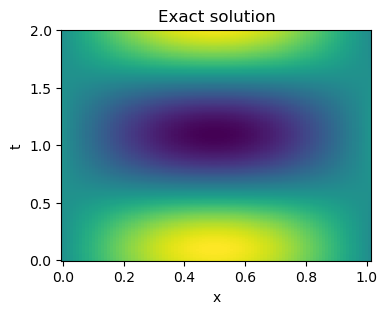

In [78]:
# Surface plot
Z_exact = exact_sln(X, Y)

# Plotting
plt.figure(figsize=(4,3))

plt.title("Exact solution")

plt.pcolor(X, Y, Z_exact, cmap = 'viridis')

plt.xlabel("x")
plt.ylabel("t")

plt.show()

In [79]:
from mpl_toolkits.mplot3d import axes3d

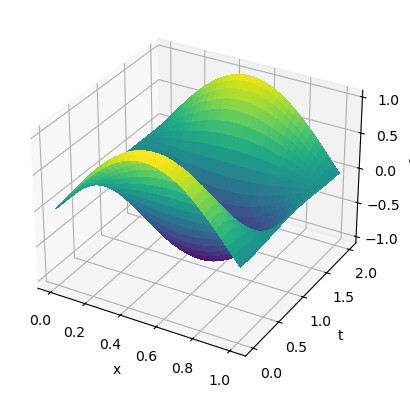

In [80]:
fig = plt.figure()

ax = plt.axes(projection='3d')
#ax.contour3D(x_grid, t_grid, u, 1000, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.plot_surface(X, Y, Z_exact, cmap='viridis', linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel(r'$\rho$')

plt.show()

## Numerical solution using central differences:

In [81]:
# Create our domain, empty matrix

rho_num = np.zeros((N_x + 1, N_t + 1))

# We want to enforce the right-side BC to be 0

print(rho_num.shape)

(101, 201)


In [82]:
# Boundary conditions
rho_num[0, :] = 0.
rho_num[-1, :] = 0.

# Initial conditions
rho_num[:, 0] = np.sin(np.pi*x)

print(rho_num.T)

[[ 0.          0.03172476  0.06341759 ...  0.03203876  0.00031416
  -0.03141076]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


$\rho(x,\Delta t) = \sin(\pi\,x)(1+\Delta t)$

In [83]:
# Second row of the matrix (we used the derivative information)

rho_num[:, 1] = np.sin(np.pi*x)*(1 + delta_t)


In [84]:
print(X.shape, Y.shape, rho_num.shape)

(201, 101) (201, 101) (101, 201)


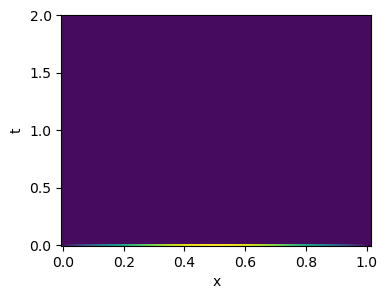

In [85]:
# Plot to check the matrix
plt.figure(figsize=(4,3))

plt.pcolor(X, Y, rho_num.T, cmap = 'viridis')

plt.xlabel("x")
plt.ylabel("t")

plt.show()

### Define r

In [86]:
# Speed
c = 1.

# Factor in front of the derivatives
r_factor = c**2*delta_t**2/delta_x**2

In [87]:
# Numerical solution - we need a FOR loop

# Time loop
for j in range(1, N_t):

    # Spatial loop
    for i in range(1, N_x-1):
        
        rho_num[i, j+1] = r_factor*(rho_num[i-1, j]\
        - 2*rho_num[i, j] + rho_num[i+1, j])\
        + 2*rho_num[i, j] - rho_num[i, j-1]

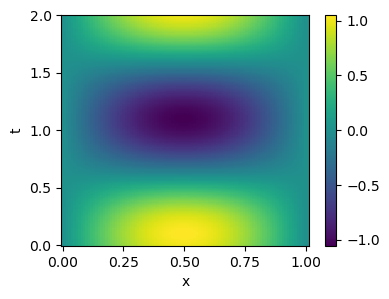

In [88]:
# Plot full solution
plt.figure(figsize=(4,3))

z_s = plt.pcolor(X, Y, rho_num.T, cmap = 'viridis')

plt.xlabel("x")
plt.ylabel("t")

plt.colorbar(z_s)

plt.show()

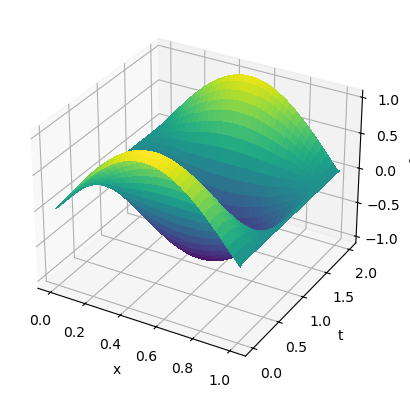

In [89]:
fig = plt.figure()

ax = plt.axes(projection='3d')
#ax.contour3D(x_grid, t_grid, u, 1000, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.plot_surface(X, Y, rho_num.T, cmap='viridis', linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel(r'$\rho$')

plt.show()

### Error map

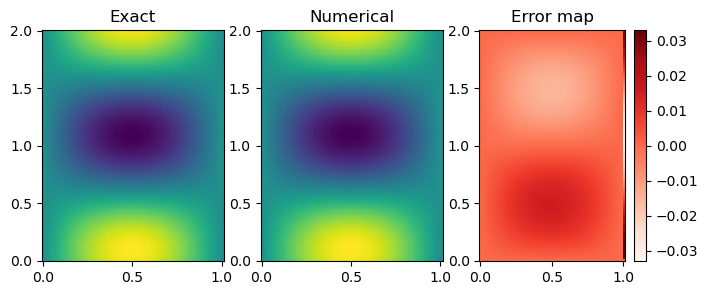

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (8,3))

ax1.pcolor(X, Y, Z_exact, cmap = 'viridis')
ax1.set_title("Exact")

ax2.pcolor(X, Y, rho_num.T, cmap = 'viridis')
ax2.set_title("Numerical")

surf3 = ax3.pcolor(X, Y, rho_num.T - Z_exact, cmap = 'Reds')
ax3.set_title("Error map")
plt.colorbar(surf3)

plt.show()

### L_2 norm error

$$
||L_2|| = \sqrt{\frac{1}{(N_x+1)(N_t+1)}\sum_{i,j} \left(\rho_i^j - \rho_{\text{exact}}(x_i, t_j)\right)^2}
$$

In [93]:
L2_error = np.sqrt(np.sum((rho_num.T - Z_exact)**2)\
         /((N_x + 1)*(N_t + 1)))

In [94]:
print(L2_error)

0.00795240283720567
